#LSTM

##Input Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

In [ ]:
!pip install colorama
from colorama import Fore

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Data From Local File
data=pd.read_csv("/content/drive/MyDrive/IHSG.csv",sep=',')

In [ ]:
data.head()

,Date,IHSG (stock prices)
0,Jan-90,441.81
1,Feb-90,504.27
2,Mar-90,612.20
3,Apr-90,638.79
4,May-90,636.40


In [ ]:
data.describe()

,IHSG (stock prices)
count,374.000000
mean,2278.636631
std,2118.064079
min,226.680000
25%,481.987500
50%,1080.170000
75%,4341.890000
max,6605.630000


In [ ]:
data['Open']= data['IHSG (stock prices)']

In [ ]:
data.shape

(374, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 374 non-null    object 
 1   IHSG (stock prices)  374 non-null    float64
 2   Open                 374 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.9+ KB


In [ ]:
data1=data.copy()

## Data Understanding

In [ ]:
# Proses membangkitkan data waktu (Boleh diskip)
dates = pd.date_range('19900101',periods=374,freq='MS')
dates

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01'],
              dtype='datetime64[ns]', length=374, freq='MS')

In [ ]:
data['Date']=pd.DataFrame(dates)
data.head()

,Date,IHSG (stock prices),Open
0,1990-01-01,441.81,441.81
1,1990-02-01,504.27,504.27
2,1990-03-01,612.20,612.20
3,1990-04-01,638.79,638.79
4,1990-05-01,636.40,636.40


In [ ]:
from datetime import datetime, date 

data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

,Date,IHSG (stock prices),Open
0,1990-01-01 00:00:00,441.810000,441.810000
1,1990-02-01 00:00:00,504.270000,504.270000
2,1990-03-01 00:00:00,612.200000,612.200000
3,1990-04-01 00:00:00,638.790000,638.790000
4,1990-05-01 00:00:00,636.400000,636.400000


In [ ]:
# Setting indeks menjadi indeks runtun waktu (Boleh diskip)

ts_df=data.set_index('Date')
ts_df.head()

,IHSG (stock prices),Open
Date,,
1990-01-01,441.81,441.81
1990-02-01,504.27,504.27
1990-03-01,612.20,612.20
1990-04-01,638.79,638.79
1990-05-01,636.40,636.40


##Plot Time Series

Text(0, 0.5, 'IHSG')

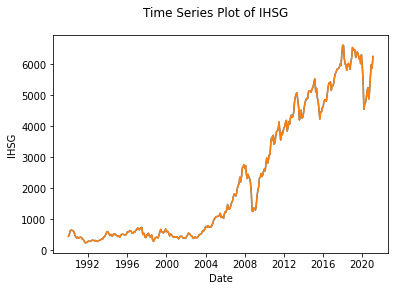

In [ ]:
#Plot Time Series ini jika tidak dilakukan prosen pengindeksan runtun waktu, maka variabel Y hanya berupa urutan observasi

fig=plt.figure()
plt.plot(ts_df)
fig.suptitle('Time Series Plot of IHSG')
plt.xlabel('Date')
plt.ylabel('IHSG')

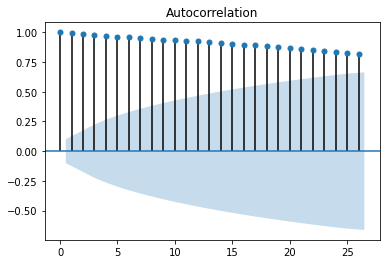

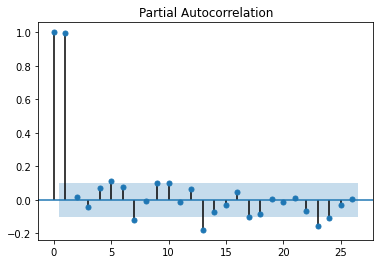

In [ ]:
# Plot ACF dan PACF
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data[['IHSG (stock prices)']])
sm.graphics.tsa.plot_pacf(data[['IHSG (stock prices)']])
plt.show()

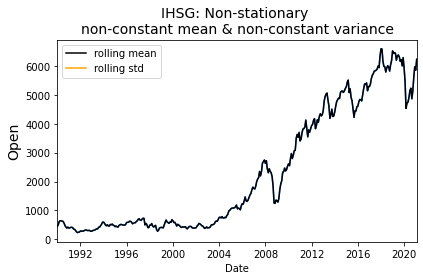

In [ ]:
# A month has 4 weeks
rolling_window = 1
sns.lineplot(x=data['Date'], y=data['Open'],color='dodgerblue')
sns.lineplot(x=data['Date'], y=data['Open'].rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=data['Date'], y=data['Open'].rolling(rolling_window).std(),  color='orange', label='rolling std')
plt.title('IHSG: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
plt.ylabel(ylabel='Open', fontsize=14)
plt.xlim([date(1990, 1, 1), date(2021, 2,1)])

plt.tight_layout()
plt.show()

##ADF Test

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller
series = data['Open']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.292256
p-value: 0.976986
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


##Transformasi

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
data1['Open_log'] = np.log(abs(data1['Open']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(data1['Open_log'], 'Transformed \n Open', ax[0])

sns.distplot(data1['Open_log'], ax=ax[1])

##Differencing

In [ ]:
# First Order Differencing
ts_diff = np.diff(data1['Open'])
data1['Open_diff_1'] = np.append([0], ts_diff)

NameError: ignored

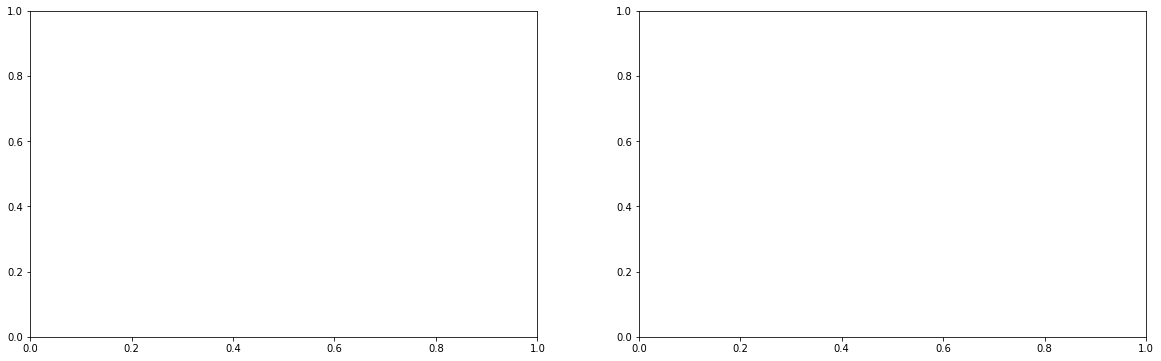

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(data1['Open_diff_1'], 'Differencing Lag 1 \n Open', ax[0])

sns.distplot(data1['Open_diff_1'], ax=ax[1])

In [ ]:
data1.head()

##EDA 2

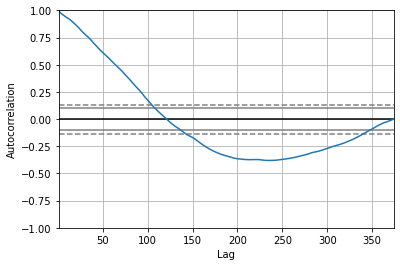

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['IHSG (stock prices)'])
plt.show()

##Split Data

In [ ]:
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

univariate_df = data1[['Date', 'Open']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

299 75


## Min Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

datafiks = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = datafiks.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.96627501],
       [-0.95648343],
       [-0.93956372],
       [-0.93539532],
       [-0.93576999],
       [-0.93766215],
       [-0.93921727],
       [-0.94832065],
       [-0.96208937],
       [-0.97024432]])

In [ ]:
# Defines the rolling window
look_back = 1
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

297 75


##Modeling

In [ ]:
x_train.shape[1]

1

In [ ]:
x_train.shape[2]

1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=100, validation_data=(x_test, y_test))

model.summary()

Epoch 1/100
297/297 [==============================] - 4s 6ms/step - loss: 0.0646 - val_loss: 0.0336
Epoch 2/100
297/297 [==============================] - 1s 3ms/step - loss: 9.4892e-04 - val_loss: 0.0040
Epoch 3/100
297/297 [==============================] - 1s 3ms/step - loss: 4.6665e-04 - val_loss: 0.0064
Epoch 4/100
297/297 [==============================] - 1s 3ms/step - loss: 5.2332e-04 - val_loss: 0.0036
Epoch 5/100
297/297 [==============================] - 1s 3ms/step - loss: 5.0877e-04 - val_loss: 0.0030
Epoch 6/100
297/297 [==============================] - 1s 3ms/step - loss: 4.9628e-04 - val_loss: 0.0025
Epoch 7/100
297/297 [==============================] - 1s 3ms/step - loss: 5.8792e-04 - val_loss: 0.0019
Epoch 8/100
297/297 [==============================] - 1s 3ms/step - loss: 4.7991e-04 - val_loss: 0.0031
Epoch 9/100
297/297 [==============================] - 1s 3ms/step - loss: 5.6177e-04 - val_loss: 0.0043
Epoch 10/100
297/297 [==============================] - 1s 

In [ ]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
train_score_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
train_score_mae = mean_absolute_error(y_train[0], train_predict[:,0])
print(Fore.GREEN + 'RMSE Test: {}'.format(score_rmse))
print(Fore.GREEN + 'RMSE Train: {}'.format(train_score_rmse))

RMSE Test: 295.1250765656463
RMSE Train: 117.9832832344132


##Uji Residu Autokerasi

In [ ]:
res = abs(y_test.transpose()-test_predict)
res

In [ ]:
RES = pd.DataFrame(res)

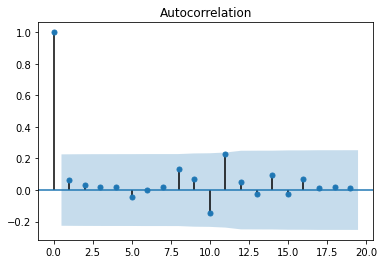

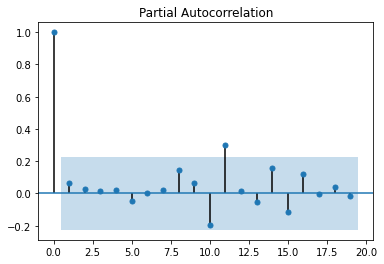

In [ ]:
sm.graphics.tsa.plot_acf(res)
sm.graphics.tsa.plot_pacf(res)
plt.show()

##Plot Perbandingan

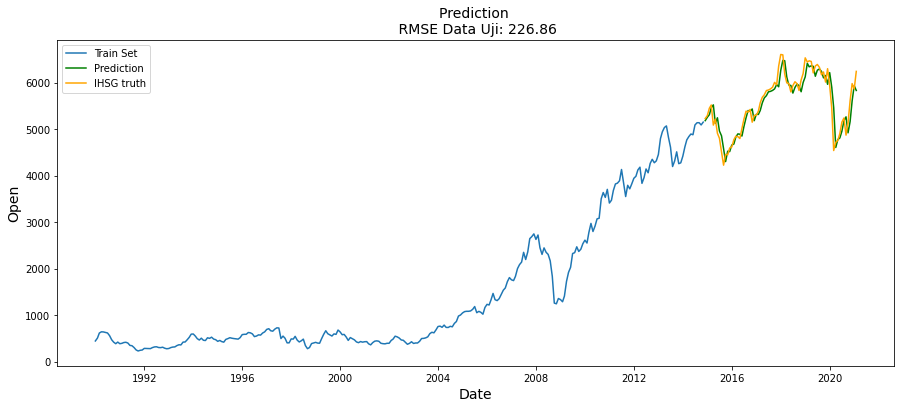

In [ ]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='IHSG truth') #navajowhite

ax.set_title(f'Prediction \n RMSE Data Uji: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Open', fontsize=14)

plt.show()

#MLP

In [ ]:
df= data.copy()

In [ ]:
# Scalling data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_scale = min_max_scaler.fit_transform(df['Open'].values.reshape(-1, 1))

In [ ]:
#Split data menjadi training dan testing
train_size = int(len(df_scale) * 0.8)
test_size = len(df_scale) - train_size
train, test = df_scale[0:train_size,:], df_scale[train_size:len(df_scale),:]
print(len(train), len(test))

299 75


In [ ]:
# Fungsi untuk membangun variabel input dan target
def input_target(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# Membangun data input dan target pada data yang kita miliki
x_train, y_train = input_target(train, 1)
x_test, y_test = input_target(test, 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(298, 1)
(298,)
(74, 1)
(74,)


##Model MLP

In [ ]:
#Import library yang dibutuhkan
import tensorflow as tf
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [ ]:
#Mendefinisikan layer input sebagai (look_back, none)
input_layer = Input(shape=(1,))

In [ ]:
#Dense layer di sini seperti hidden layer
dense1 = Dense(128, activation='relu')(input_layer)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)

In [ ]:
#Mendefinisikan output layer
output_layer = Dense(1, activation='linear')(dense3)

In [ ]:
#Membentuk model
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 128)               256       
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os
#Running model pada data training
save_path = "."
save_weights_at=os.path.join('keras_model','Bobot_Open.hdf5')
save_best=ModelCheckpoint(save_weights_at, monitor='val_loss',verbose=0,
                          save_best_only=True,save_weights_only=False)
ts_model.fit(x=x_train, y=y_train, batch_size=16, epochs=100,
             verbose=1, callbacks=[save_best], validation_data=(x_train, y_train),
             shuffle=True)
ts_model.save(os.path.join(save_path,"network.h5"))

In [ ]:
#Prediksi data training dan testing berdasarkan bobot terbaik yang didapat
best_model = load_model(os.path.join(save_path,"network.h5"))
trainPredict = best_model.predict(x_train)
testPredict = best_model.predict(x_test)

#Re-shape data Y train dan testing agar dapat dikonversi menjadi data asli kembali
y_tr=y_train.reshape(-1,1)
y_ts=y_test.reshape(-1,1)

#Konfersi data train dan test
trainPredict=min_max_scaler.inverse_transform(trainPredict)
y_train=min_max_scaler.inverse_transform(y_tr)
testPredict=min_max_scaler.inverse_transform(testPredict)
y_test=min_max_scaler.inverse_transform(y_ts)

In [ ]:
#Melihat R-square dari data training dan testing
#R-Square, RMSE, MSE, MAPE, dsb sering digunakan untuk kasus regresi, karena tidak dapat menggunakan akurasi, presisi, recall, dsb.
from sklearn.metrics import r2_score

r2tr = r2_score(y_train, trainPredict)
print('R-squared data training:', round(r2tr,4)*100,"%")
r2ts = r2_score(y_test, testPredict)
print('R-squared data testing:', round(r2ts,4)*100,"%")

R-squared data training: 99.47 %
R-squared data testing: 86.5 %


In [ ]:
# Menghitung RMSE
from sklearn import metrics

score = np.sqrt(metrics.mean_squared_error(trainPredict,y_train))
print(f"RMSE data training: {score}")
score = np.sqrt(metrics.mean_squared_error(testPredict,y_test))
print(f"RMSE data testing: {score}")

RMSE data training: 105.6143237954338
RMSE data testing: 230.88936359760132


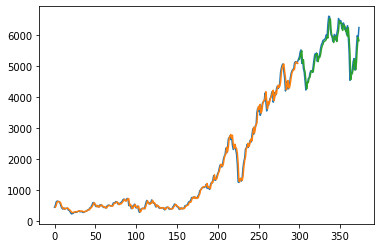

In [ ]:
#Memvisualisasi hasil prediksi vs. aktual

look_back=1
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_scale)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_scale)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(df_scale), :] = testPredict
# plot baseline and predictions
plt.plot(df[['Open']])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Uji Residu Autokorelasi MLP

In [ ]:
res2= abs(testPredict-y_test)

In [ ]:
RES2= pd.DataFrame(res2)

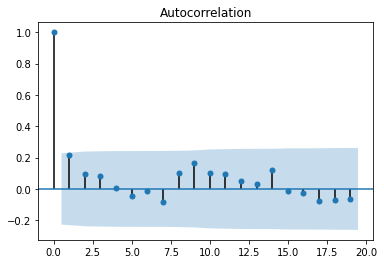

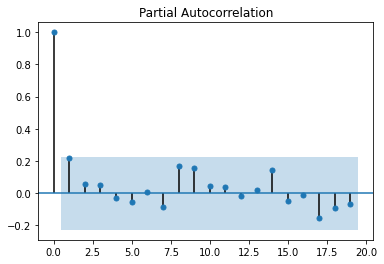

In [ ]:
sm.graphics.tsa.plot_acf(RES2)
sm.graphics.tsa.plot_pacf(RES2)
plt.show()